# Training Jupyter Notebook
### Hidrologi Lanjut

Tanggal training: 2018-02-15
Durasi: 13.30 - 17.00

Topik:
- pengenalan tampilan jupyter
- penggunaan operator
- penggunaan numpy dan matplotlib
- kelebihan numpy.array
- memanggil nilai dari numpy.array
- [Latihan] membuat angka dengan memanipulasi matriks
- pemanggilan nilai array dengan menggunakan [:], dan penjelasan inklusif dan eksklusif
- penggunaan numpy.zeros, np.zeros_like, np.ones_like, ..
- penggunaan np.arange, np.linspace
- [Latihan] membuat hidrograf superposisi

## Membuat unit hidrograf 
### Latihan 1

In [8]:
# Initialization and importing package
# %reset -f
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Latihan 2, membuat hidrograf superposisi
# Hidrograf satuan dalam 1 cm, 2 jam
hujan = 4 # tinggi hujan cm
lagging = 2 # jam lagging

uh = np.array([0, 0, 2.5, 5, 10, 8.75, 7.5, 6.25, 5, 3.75, 2.5, 0])
absis = np.linspace (0, 22, 12) # Fungsi ini juga dapat dalam bentuk np.arange(0, 22 + 1, 2) dengan catatan batas akhirnya harus ditambah 1 karena bersifat ekslusif

# UH

uhlin = uh * hujan

In [9]:
# Hitung superposisi
# Cara 3 - akbar

alin = hujan * uh
absisbaru = np.linspace (0, 24, 13)

uhabaru = np.zeros(13)
uhabaru[:12] = alin
uhbbaru = np.zeros(13)
uhbbaru[1:] = alin

superposisi = uhabaru + uhbbaru

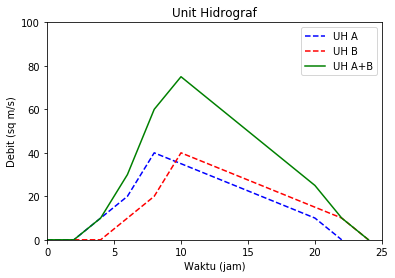

In [10]:
# Gambar plot unit hidrograf (4 cm, 2 jam)
plt.plot(absis, uhlin, 'b--');

# Gambar unit hidrograf (4 cm, 2 jam, lag: 2 jam)
plt.plot(absis + lagging, uhlin, 'r--');

# Gambar superposisi
plt.plot(absisbaru, superposisi, 'g')

# Atur plot
plt.xlim(0,25)
plt.ylim(0,100)
plt.title('Unit Hidrograf')
plt.ylabel('Debit (sq m/s)')
plt.xlabel('Waktu (jam)')
plt.legend(['UH A', 'UH B', 'UH A+B'], loc='best');  

# Latihan 2

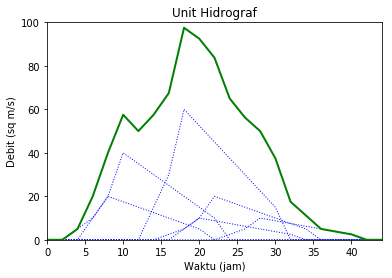

In [18]:
import numpy as np
import matplotlib.pyplot as plt

hujan = [2,4,0,0,0,6,1,2,0,0,1] # cm
# hujan = [4]
# hujan = [1, 1, 1, 1, 1, 1, 1]
lagging = 2 # jam
satuanhujan = 2 # jam
uh = np.array([0, 0, 2.5, 5, 10, 8.75, 7.5, 6.25, 5, 3.75, 2.5, 0]) # unit hidrograf
abmax = 22
ab_point = 12

geser = lagging/satuanhujan

abmaxsup = abmax + int(len(hujan) * satuanhujan)
ab_pointsup = ab_point + int(len(hujan))

absisuh = np.linspace(0, abmax, ab_point)

ab_akhir = np.linspace(0, abmaxsup, ab_pointsup)

hasil = np.zeros([len(hujan), ab_pointsup])
superposisi = np.zeros(ab_pointsup)
# hasil = np.zeros(shape=(len(hujan), 12 + len(hujan)))

# isi unit hidrograf linear (dikali dengan tinggi hujan)
for i in range(len(hujan)):
    uhlin = uh * hujan[i]
    
    bbel = len(uh) + i
    bbel = int(bbel) # batas belakang
    hasil[i,i:bbel] = uhlin
    
    plt.plot(ab_akhir,hasil[i,:],'b:', lw=1)

for j in range(ab_pointsup):
    superposisi[j] = np.sum(hasil[:,j])

plt.plot(ab_akhir, superposisi[:], 'g', lw=2)

# Atur plot
plt.xlim(0,abmaxsup)
plt.ylim(0,100)
plt.title('Unit Hidrograf')
plt.ylabel('Debit (sq m/s)')
plt.xlabel('Waktu (jam)');
# plt.legend(['UH', 'UH B', 'UH A+B'], loc='best');  
# print(hasil)

In [15]:
print (superposisi)

[ 0.    0.    5.   20.   40.   57.5  50.   57.5  67.5  97.5  92.5  83.75
 65.   56.25 50.   37.5  17.5  11.25  5.    3.75  2.5   0.    0.  ]
